<img src="ups.png">

# Red Neuronal Adaline 


## Introducción

Las redes ADALINE (ADAptive LInear NEuron networks, ADAptive LINear Element) fueron desarrolladas en 1959 por Bernie Widrow poco después de que Rosenblatt desarrollara el Perceptrón.(Universidad Tecnológica de Pereira, 2000)



## Descripción

Esta neurona es similar al Perceptrón simple, pero utiliza como función de transferencia la función identidad en lugar de la función signo. La salida de la ADALINE es simplemente una función lineal de las entradas (ponderadas con los pesos sinápticos).

Utiliza un aprendizaje off-line con supervisión denominado LMS o regla del mínimo error cuadrático medio, también denominado regla delta.
Tiene una gran diferencia con el Perceptrón, la manera de utilizar la salida en la regla de aprendizaje, el Perceptrón utiliza la salida de la función umbral (binaria) para el aprendizaje. Solo se tiene en cuenta si se ha equivocado o no.



<img src="1.png">

En Adaline se utiliza directamente la salida de la red (real) teniendo en cuenta cuánto se ha equivocado.

### Estructura de la red ADALINE 
(Cortes & Cordoba, 2015)

<img src="2.png">

La Salida está dada por:

$$a = purelin(\mathbf{W}_p + b) =\mathbf{W}_p + b$$

Para una red Adaline de una sola neurona con dos entradas la representación es la siguiente:

<img src="3.png">

En similitud con el Perceptrón, el límite de la característica de decisión para la red Adaline se presenta cuando n = 0, por lo tanto:


$$w^{T} p + b = 0$$

Específica la línea que separa en dos regiones el espacio de entrada, como se muestra en la siguiente gráfica:

<img src="5.png">

La salida de la neurona es mayor que cero en el área gris, en el área blanca la salida es menor que cero.  Como se mencionó anteriormente, la red Adaline puede clasificar correctamente patrones linealmente separables en dos categorías.


## Algoritmo de entrenamiento


Adaline utiliza la regla Delta, y que se define, para un patrón de entrada $x^{p}$ con una salida estimada $y^{p}$ y una salida deseada $d^{p}$ , como  $d^{p}- y^{p}$.

En donde define el error mediante la ecuación:

$$E= \frac{1}{2} \sum_{p=1}^{m}(d^{p}-y^{p})^{2}$$

 
La manera de reducir este error global es ir modificando los valores de los pesos al procesar cada entrada,


$$E= \frac{\partial E}{\mathbf{{\partial W}}_j} = \frac{\partial E}{\partial y} * \frac{\partial y}{\mathbf{\partial W}_j} = -(d-y)* \mathbf{x}_j$$



En donde se puede calcular el valor de la derivada respecto a cada peso:

$${\mathbf{W}_j} = {\mathbf{W}_j} - γ * ∆{\mathbf{W}_j} = {\mathbf{W}_j} - γ*\frac{\partial E}{\mathbf{\partial W}_j}$$


Y la modificación de los pesos quedaría dado por la expresión:

$$∆{\mathbf{W}_j}= γ*(d-y)*{\mathbf{x}_j}$$

El Algoritmo LMS o Regla Delta, logra minimizar el error cuadrático medio, desplazando las fronteras de decisión lejos de los patrones de entrenamiento.


### Funcionamiento del algoritmo de aprendizaje


1. Asigna valores aleatorios a los pesos ${\mathbf{W}_i}$
2. Aplica un vector de entrada para obtener una salida correspondiente:

$$a = purelin(\mathbf{W}_p + b) =\mathbf{W}_p + b$$

Realiza el cálculo del error mediante:  

$$e= \mathbf{t}_i-a$$

3. Se actualizan los pesos: 

$$W^{nuevo}= W^{anterior}+2aep^{t}$$

$$b^{nuevo}= b^{anterior}+2ae$$

4. Repetimos los pasos del 1 al 3 con todos los vectores de entrada.

5. Dependiendo de los resultados que se hubieren obtenido, se decide si se termina o se retorna al segundo paso.


### Aplicaciones de la red ADALINE


La red Adaline tiene varias aplicaciones, entre ellas están: (Cortes & Cordoba, 2015)

1. Asociación de patrones: se puede aplicar a este tipo de problemas siempre que los patrones sean linealmente separables.
2. Procesamiento de señales
3. Filtros de ruido: Limpiar ruido de señales transmisoras de información.
4. Filtros adaptativos: Un Adaline es capaz de predecir el valor de una señal en el instante t+1 si se conoce el valor de la misma en los p instantes anteriores (p es >0 y su valor depende del problema). El error de la predicción será mayor o menor según qué señal queramos predecir. Si la señal se corresponde a una serie temporal el Adaline, pasado un tiempo, será capaz de dar predicciones exactas.





## Ejemplo Red Adaline con corpus Iris

(A Machine Learning Craftsmanship Blog, 2017)


In [1]:
import numpy as np
from numpy.random import seed
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [2]:
df = pd.read_csv('iris.csv', header=None)
df.head()

,0,1,2,3,4
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


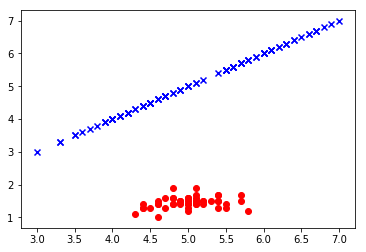

In [3]:
y = df.iloc[0:100,4].values
y = np.where(y == 'Iris-setosa', -1, 1)
X = df.iloc[0:100,[0,2]].values
plt.scatter(X[:50,0], X[:50,1], color='red', marker='o', label='setosa')
plt.scatter(X[50:100], X[50:100], color='blue', marker='x', label='versicolor')
plt.show()

In [4]:
class AdalineGD(object):
    
    def __init__(self, eta=0.01, n_iter=50):
        self.eta = eta
        self.n_iter = n_iter
    def fit(self, X, y):
        self.w_ = np.zeros(1 + X.shape[1])
        self.cost_ = []
        for i in range(self.n_iter):
            output = self.net_input(X)
            errors = (y - output)
            self.w_[1:] += self.eta * X.T.dot(errors)
            self.w_[0] += self.eta * errors.sum()
            cost = (errors**2).sum() / 2.0
            self.cost_.append(cost)
        return self
    def net_input(self, X):
       """Calculate net input"""
       return np.dot(X, self.w_[1:]) + self.w_[0]

    def activation(self, X):
       """Compute linear activation"""
       return self.net_input(X)
    def predict(self, X):
       """Return class label after unit step"""
       return np.where(self.activation(X) >= 0.0, 1, -1)


c:\program files\python37\lib\site-packages\ipykernel_launcher.py:14: RuntimeWarning: overflow encountered in square
  
c:\program files\python37\lib\site-packages\numpy\core\_methods.py:36: RuntimeWarning: overflow encountered in reduce
  return umr_sum(a, axis, dtype, out, keepdims, initial)


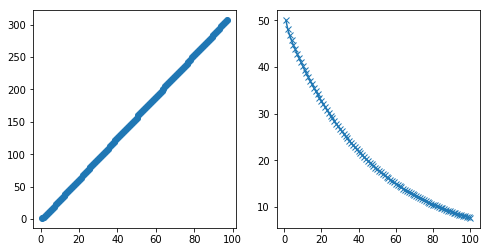

In [5]:
fig,ax = plt.subplots(nrows=1,ncols=2,figsize=(8,4))
ada1 = AdalineGD(n_iter=100).fit(X,y)
ax[0].plot(range(1,len(ada1.cost_) +1),np.log10(ada1.cost_),marker='o')

ada2 = AdalineGD(n_iter=100,eta=0.0001).fit(X,y)
ax[1].plot(range(1,len(ada2.cost_) +1), (ada2.cost_),marker='x')
plt.show()

## Bibliografía

Cortes, G., & Cordoba, E. (2015). Obtenido de https://prezi.com/j82sylwvm0a5/redes-adaline/

Universidad Tecnológica de Pereira. (2000). Obtenido de http://medicinaycomplejidad.org/pdf/redes/Adaline.pdf

A Machine Learning Craftsmanship Blog. (2017). Obtenido de https://mllog.github.io/2016/11/04/Python-ML-Chapter-2/